In [1]:
import sys
sys.path.append("./")
from OmniTokenizer import OmniTokenizer_VQGAN
from PIL import Image
import numpy as np

c:\Users\isaia\OneDrive\Desktop\Learning-From-Human-Demonstrations\.conda\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\isaia\OneDrive\Desktop\Learning-From-Human-Demonstrations\.conda\Lib\site-packages\timm\models\layers\__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


In [12]:
vqgan_ckpt = "./imagenet_k600.ckpt"
vqgan = OmniTokenizer_VQGAN.load_from_checkpoint(vqgan_ckpt, strict=False)

c:\Users\isaia\OneDrive\Desktop\Learning-From-Human-Demonstrations\.conda\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\isaia\OneDrive\Desktop\Learning-From-Human-Demonstrations\.conda\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


loaded pretrained LPIPS loss from c:\Users\isaia\OneDrive\Desktop\Learning-From-Human-Demonstrations\OmniTokenizer\modules\cache\vgg.pth


c:\Users\isaia\OneDrive\Desktop\Learning-From-Human-Demonstrations\.conda\Lib\site-packages\pytorch_lightning\core\saving.py:208: UserWarning: Found keys that are in the model state dict but not in the checkpoint: ['video_discriminator.model4.1.weight', 'video_discriminator.model4.1.bias', 'video_discriminator.model4.1.running_mean', 'video_discriminator.model4.1.running_var']
  rank_zero_warn(


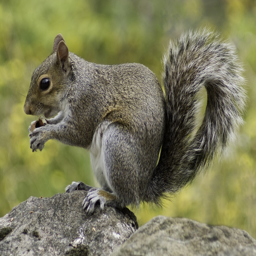

torch.Size([1, 1, 32, 32])


In [13]:
from PIL import Image
import torch
image_path = 'Images/squirrel.jpg'
img = Image.open(image_path)
img = img.resize((256, 256))
inp = torch.tensor(np.array(img).transpose(2, 1, 0).reshape((1, 3, 256, 256)), dtype=torch.float32)
img2 = inp.detach().numpy().astype(np.uint8)[0].transpose(2, 1, 0)
#print(img2.min(), img2.max())
display(Image.fromarray(img2))
tokens = vqgan.encode(inp, True)
print(tokens.shape)
recons = vqgan.decode(tokens, True)


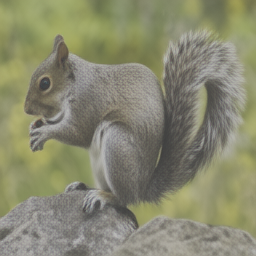

In [19]:
img_rec = (((recons.detach().numpy() + 1)/2)*255).astype(np.uint8)[0].transpose(2, 1, 0)
img = Image.fromarray(img_rec)
display(img)